In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import datetime 
from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
#import dash    sion 1.0.0)
#import dash_table
#import dash_core_components as dcc
#import dash_html_components as html
#from dash.dependencies import Input, Output

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh') #available styles: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
import seaborn as sns

In [ ]:
#set file paths 
file_path = "/content/drive/MyDrive/Colab Notebooks/Group Project/"
accident_file_name ="merged redlight incident.csv" 
redlight_file_name = "red light camera.csv"


In [ ]:
accidents=pd.read_csv(file_path + accident_file_name) #open cleaned ksi accidents file
redlight=pd.read_csv(file_path + redlight_file_name) #open cleaned red light camera file

In [ ]:
accidents.drop('Unnamed: 0', axis=1, inplace=True)  

In [ ]:
accidents['ACCNUM']=accidents['ACCNUM'].astype('int64')  # change the datatype from float to int


In [ ]:
accidents.head()

,ACCNUM,ACCLASS,INVOLVED,MOTIVE,LATITUDE,LONGITUDE,DATE_TIME,ROAD_CLASS,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,DISTRICT,NEIGHBOURHOOD,HOOD_ID,LOCCOORD,PEOPLE_COUNT,FATAL_INJURY_COUNT,MAJOR_INJURY_COUNT,MINOR_INJURY_COUNT,NO_INJURY_COUNT,NULL_INJURY_COUNT,DRIVERS_COUNT,PEDESTRIAN_COUNT,PASSENGER_COUNT,CYCLIST_COUNT,PEOPLE_VEH_COUNT,AUTOMOBILE_VEH_COUNT,RECREATIONAL_VEH_COUNT,OTHER_VEH_COUNT,REDLIGHT_CAMERA,DATE,DATA_TYPE,CAMERA_ID,CAMERA_DATE_TIME,CAMERA_DATE
0,25301,Non-Fatal Injury,"Pedestrian, Automobile",Not Recorded,43.710967,-79.377116,2020-01-04 18:50:00,Major Arterial,Intersection Related,Traffic Signal,Rain,Dark,Wet,Pedestrian Collisions,North York,Leaside-Bennington (56),56,Intersection,2,0,1,0,1,0,1,1,0,0,0,1,0,1,False,2020-01,Accident,NaN,NaN,NaN
1,26294,Fatal,"Pedestrian, Automobile",Not Recorded,43.659568,-79.375560,2020-01-04 22:14:00,Major Arterial,Non Intersection,No Control,Clear,"Dark, artificial",Dry,Pedestrian Collisions,Toronto and East York,Moss Park (73),73,Mid-Block,2,1,0,0,1,0,1,1,0,0,0,1,0,1,False,2020-01,Accident,NaN,NaN,NaN
2,37330,Non-Fatal Injury,"Pedestrian, Automobile",Aggressive and Distracted Driving Collision,43.649699,-79.433650,2020-01-06 15:55:00,Minor Arterial,At Intersection,Traffic Signal,Clear,"Dawn, artificial",Dry,Pedestrian Collisions,Toronto East York,Little Portugal (84),84,Intersection,2,0,1,0,1,0,1,1,0,0,0,1,0,1,False,2020-01,Accident,NaN,NaN,NaN
3,45664,Non-Fatal Injury,Automobile,Aggressive and Distracted Driving Collision,43.725577,-79.297481,2020-01-07 18:50:00,Major Arterial,At Intersection,Traffic Signal,Clear,Dark,Dry,Turning Movement,Scarborough,Clairlea-Birchmount (120),120,Intersection,3,0,1,1,1,0,2,0,1,0,0,2,0,1,False,2020-01,Accident,NaN,NaN,NaN
4,56815,Non-Fatal Injury,Automobile,"Speeding Related Collision, Red Light Related...",43.701876,-79.575588,2020-01-09 11:00:00,Major Arterial,At Intersection,Traffic Signal,Clear,Daylight,Dry,Angle,Etobicoke York,West Humber-Clairville (1),1,Intersection,4,0,1,0,3,0,4,0,0,0,0,3,0,1,True,2020-01,Accident,178.0,2021-07-29 04:00:00,2021-07


In [ ]:
rlaccidents=accidents[~accidents['CAMERA_ID'].isnull()]  #filter the accidents that happened at redlight areas 

In [ ]:
rlaccidents

,ACCNUM,ACCLASS,INVOLVED,MOTIVE,LATITUDE,LONGITUDE,DATE_TIME,ROAD_CLASS,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,DISTRICT,NEIGHBOURHOOD,HOOD_ID,LOCCOORD,PEOPLE_COUNT,FATAL_INJURY_COUNT,MAJOR_INJURY_COUNT,MINOR_INJURY_COUNT,NO_INJURY_COUNT,NULL_INJURY_COUNT,DRIVERS_COUNT,PEDESTRIAN_COUNT,PASSENGER_COUNT,CYCLIST_COUNT,PEOPLE_VEH_COUNT,AUTOMOBILE_VEH_COUNT,RECREATIONAL_VEH_COUNT,OTHER_VEH_COUNT,REDLIGHT_CAMERA,DATE,DATA_TYPE,CAMERA_ID,CAMERA_DATE_TIME,CAMERA_DATE
4,56815,Non-Fatal Injury,Automobile,"Speeding Related Collision, Red Light Related...",43.701876,-79.575588,2020-01-09 11:00:00,Major Arterial,At Intersection,Traffic Signal,Clear,Daylight,Dry,Angle,Etobicoke York,West Humber-Clairville (1),1,Intersection,4,0,1,0,3,0,4,0,0,0,0,3,0,1,True,2020-01,Accident,178.0,2021-07-29 04:00:00,2021-07
26,212688,Non-Fatal Injury,"Pedestrian, Truck",Not Recorded,43.750178,-79.463344,2020-01-31 04:15:00,Major Arterial,At Intersection,Traffic Signal,Clear,"Dark, artificial",Dry,Pedestrian Collisions,North York,Downsview-Roding-CFB (26),26,Intersection,2,0,1,0,1,0,1,1,0,0,0,0,0,2,True,2020-01,Accident,170.0,2021-06-29 04:00:00,2021-06
40,382209,Non-Fatal Injury,Automobile,"Red Light Related Collision, Aggressive and D...",43.737101,-79.343410,2020-02-23 07:07:00,Major Arterial,At Intersection,Traffic Signal,Clear,Daylight,Dry,Angle,Etobicoke York,Banbury-Don Mills (42),42,Intersection,2,0,1,1,0,0,2,0,0,0,0,2,0,0,True,2020-02,Accident,65.0,2009-09-10 04:00:00,2009-09
58,540779,Non-Fatal Injury,"Cyclist, Automobile",Not Recorded,43.718154,-79.240329,2020-03-15 15:23:00,Major Arterial,At Intersection,Traffic Signal,Clear,Daylight,Dry,Turning Movement,Scarborough,Cliffcrest (123),123,Intersection,3,0,1,0,2,0,1,0,1,1,1,1,0,1,True,2020-03,Accident,152.0,2021-05-25 04:00:00,2021-05
67,627897,Non-Fatal Injury,"Pedestrian, Automobile, Truck","Speeding Related Collision, Aggressive and Di...",43.708586,-79.478046,2020-03-30 09:45:00,Major Arterial,At Intersection,Traffic Signal,Rain,Daylight,Wet,Pedestrian Collisions,Etobicoke York,Brookhaven-Amesbury (30),30,Intersection,3,0,1,0,2,0,2,1,0,0,0,1,0,2,True,2020-03,Accident,44.0,2009-03-19 04:00:00,2009-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5961,9002262489,Non-Fatal Injury,"Pedestrian, Automobile",Not Recorded,43.775401,-79.521693,2019-11-22 22:00:00,Major Arterial,At Intersection,Traffic Signal,Clear,Dark,Dry,Pedestrian Collisions,North York,York University Heights (27),27,Intersection,2,0,1,0,1,0,1,1,0,0,0,1,0,1,True,2019-11,Accident,145.0,2021-03-05 05:00:00,2021-03
5969,9002330341,Non-Fatal Injury,"Pedestrian, Automobile",Aggressive and Distracted Driving Collision,43.812899,-79.243037,2019-12-03 10:30:00,Major Arterial,Intersection Related,Traffic Signal,Clear,Daylight,Wet,Pedestrian Collisions,Scarborough,Malvern (132),132,Intersection,2,0,1,0,1,0,1,1,0,0,0,1,0,1,True,2019-12,Accident,158.0,2021-06-03 04:00:00,2021-06
5979,9002404959,Non-Fatal Injury,"Pedestrian, Automobile",Aggressive and Distracted Driving Collision,43.744704,-79.486408,2019-12-13 20:41:00,Major Arterial,At Intersection,Traffic Signal,Clear,"Dark, artificial",Dry,Pedestrian Collisions,North York,Downsview-Roding-CFB (26),26,Intersection,2,0,1,0,1,0,1,1,0,0,0,1,0,1,True,2019-12,Accident,35.0,2009-03-17 04:00:00,2009-03
5992,9002481518,Non-Fatal Injury,"Pedestrian, Automobile",Aggressive and Distracted Driving Collision,43.775035,-79.347003,2019-12-25 08:50:00,Major Arterial,At Intersection,Traffic Signal,Clear,Daylight,Wet,Pedestrian Collisions,North York,Henry Farm (53),53,Intersection,2,0,1,0,1,0,1,1,0,0,0,1,0,1,True,2019-12,Accident,142.0,2019-09-19 04:00:00,2019-09


In [ ]:
#latitude and longitude of Toronto
lat = 43.651070       
lng = -79.347015

In [ ]:
my_token = 'mapbox token'

# plot two df of Toronto traffic accident and red light camera on one map 
fig = go.Figure()

fig.add_trace(go.Scattermapbox(
        lat=rlaccidents.LATITUDE,
        lon=rlaccidents.LONGITUDE,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=12,
            color='rgb(0, 0, 255)',
            opacity=0.5
        ),

        hoverinfo='text',
        hovertext=rlaccidents[['DATE_TIME',
                               'ACCLASS',
                               'INVOLVED']],
        name='Collisions at Intersections with Camara'
    ))

fig.add_trace(go.Scattermapbox(
        lat=redlight.LATITUDE,
        lon=redlight.LONGITUDE,
        mode='markers',
        
        marker=dict(
            size=8,
            
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        hoverinfo='text',
        hovertext=redlight['ACTIVATION_TIME'],
        name='Red Light Camera'
    ))


fig.update_layout(
    title='Red Light Camera (2007-2021) Positions and Collisions (2006-2020) at Intersections with Cameras',
    autosize=True,
    hovermode='closest',
    showlegend=True,
    mapbox=dict(
        accesstoken=my_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=lat,
            lon=lng
        ),
        pitch=0,
        zoom=10
    ),
    mapbox_style='light',
    width=1200, height=800,

)

fig.show()


In [ ]:
itscaccidents=accidents[(accidents['ACCLOC']=='At Intersection') | (accidents['ACCLOC']=='Intersection Related')] # filter all the accidents that happened at intersections
itscaccidents

,ACCNUM,ACCLASS,INVOLVED,MOTIVE,LATITUDE,LONGITUDE,DATE_TIME,ROAD_CLASS,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,DISTRICT,NEIGHBOURHOOD,HOOD_ID,LOCCOORD,PEOPLE_COUNT,FATAL_INJURY_COUNT,MAJOR_INJURY_COUNT,MINOR_INJURY_COUNT,NO_INJURY_COUNT,NULL_INJURY_COUNT,DRIVERS_COUNT,PEDESTRIAN_COUNT,PASSENGER_COUNT,CYCLIST_COUNT,PEOPLE_VEH_COUNT,AUTOMOBILE_VEH_COUNT,RECREATIONAL_VEH_COUNT,OTHER_VEH_COUNT,REDLIGHT_CAMERA,DATE,DATA_TYPE,CAMERA_ID,CAMERA_DATE_TIME,CAMERA_DATE
0,25301,Non-Fatal Injury,"Pedestrian, Automobile",Not Recorded,43.710967,-79.377116,2020-01-04 18:50:00,Major Arterial,Intersection Related,Traffic Signal,Rain,Dark,Wet,Pedestrian Collisions,North York,Leaside-Bennington (56),56,Intersection,2,0,1,0,1,0,1,1,0,0,0,1,0,1,False,2020-01,Accident,NaN,NaN,NaN
2,37330,Non-Fatal Injury,"Pedestrian, Automobile",Aggressive and Distracted Driving Collision,43.649699,-79.433650,2020-01-06 15:55:00,Minor Arterial,At Intersection,Traffic Signal,Clear,"Dawn, artificial",Dry,Pedestrian Collisions,Toronto East York,Little Portugal (84),84,Intersection,2,0,1,0,1,0,1,1,0,0,0,1,0,1,False,2020-01,Accident,NaN,NaN,NaN
3,45664,Non-Fatal Injury,Automobile,Aggressive and Distracted Driving Collision,43.725577,-79.297481,2020-01-07 18:50:00,Major Arterial,At Intersection,Traffic Signal,Clear,Dark,Dry,Turning Movement,Scarborough,Clairlea-Birchmount (120),120,Intersection,3,0,1,1,1,0,2,0,1,0,0,2,0,1,False,2020-01,Accident,NaN,NaN,NaN
4,56815,Non-Fatal Injury,Automobile,"Speeding Related Collision, Red Light Related...",43.701876,-79.575588,2020-01-09 11:00:00,Major Arterial,At Intersection,Traffic Signal,Clear,Daylight,Dry,Angle,Etobicoke York,West Humber-Clairville (1),1,Intersection,4,0,1,0,3,0,4,0,0,0,0,3,0,1,True,2020-01,Accident,178.0,2021-07-29 04:00:00,2021-07
5,66893,Non-Fatal Injury,"Pedestrian, Automobile",Aggressive and Distracted Driving Collision,43.680693,-79.348178,2020-01-10 17:21:00,Collector,At Intersection,Stop Sign,Rain,"Dark, artificial",Wet,SMV Other,Toronto and East York,Playter Estates-Danforth (67),67,Intersection,2,0,1,0,1,0,1,1,0,0,0,1,0,1,False,2020-01,Accident,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5992,9002481518,Non-Fatal Injury,"Pedestrian, Automobile",Aggressive and Distracted Driving Collision,43.775035,-79.347003,2019-12-25 08:50:00,Major Arterial,At Intersection,Traffic Signal,Clear,Daylight,Wet,Pedestrian Collisions,North York,Henry Farm (53),53,Intersection,2,0,1,0,1,0,1,1,0,0,0,1,0,1,True,2019-12,Accident,142.0,2019-09-19 04:00:00,2019-09
5993,9002484268,Non-Fatal Injury,Automobile,Not Recorded,43.645556,-79.369808,2019-12-25 21:18:00,Major Arterial,At Intersection,Traffic Signal,Clear,"Dark, artificial",Dry,Turning Movement,Toronto and East York,Waterfront Communities-The Island (77),77,Intersection,8,0,1,7,0,0,3,0,5,0,0,3,0,5,False,2019-12,Accident,NaN,NaN,NaN
5996,9002500260,Non-Fatal Injury,"Pedestrian, Automobile","Red Light Related Collision, Aggressive and D...",43.658438,-79.384853,2019-12-28 15:14:00,Major Arterial,At Intersection,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,Toronto and East York,Bay Street Corridor (76),76,Intersection,3,0,1,0,2,0,2,1,0,0,0,2,0,1,False,2019-12,Accident,NaN,NaN,NaN
5997,9002501134,Non-Fatal Injury,"Pedestrian, Automobile",Not Recorded,43.691519,-79.570796,2019-12-28 17:40:00,Major Arterial,At Intersection,Traffic Signal,Clear,Dark,Dry,Pedestrian Collisions,Etobicoke York,West Humber-Clairville (1),1,Intersection,3,0,1,0,2,0,1,1,1,0,0,1,0,2,True,2019-12,Accident,101.0,2017-07-10 04:00:00,2017-07


In [ ]:
itscaccidents_sim=itscaccidents[['LATITUDE','LONGITUDE','ACCNUM','CAMERA_ID','DATE_TIME']].round(3) 
#create a shorter dataframe and round the latitude and longitude to 3 decimals to roughly group accidents to each intersections

In [ ]:
#only need to know if the intersections are monitored by cameras or not 
#so set all the intersections without cameras with 0
itscaccidents_sim['CAMERA_ID'].fillna(0,inplace=True)


In [ ]:
#set all the intersections with cameras with 1
itscaccidents_sim['CAMERA_ID'].loc[itscaccidents_sim['CAMERA_ID']!=0.0]=1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
itscaccidents_sim

,LATITUDE,LONGITUDE,ACCNUM,CAMERA_ID,DATE_TIME
0,43.711,-79.377,25301,0.0,2020-01-04 18:50:00
2,43.650,-79.434,37330,0.0,2020-01-06 15:55:00
3,43.726,-79.297,45664,0.0,2020-01-07 18:50:00
4,43.702,-79.576,56815,1.0,2020-01-09 11:00:00
5,43.681,-79.348,66893,0.0,2020-01-10 17:21:00
...,...,...,...,...,...
5992,43.775,-79.347,9002481518,1.0,2019-12-25 08:50:00
5993,43.646,-79.370,9002484268,0.0,2019-12-25 21:18:00
5996,43.658,-79.385,9002500260,0.0,2019-12-28 15:14:00
5997,43.692,-79.571,9002501134,1.0,2019-12-28 17:40:00


In [ ]:
itscaccidents_sim.CAMERA_ID.value_counts()

0.0    2758
1.0     515
Name: CAMERA_ID, dtype: int64

In [ ]:
#group accidents by intersections 
itscaccidents_map=itscaccidents_sim.groupby(['LATITUDE','LONGITUDE']).count()


In [ ]:
itscaccidents_map.reset_index(inplace=True)

In [ ]:
# group accidents by intersections and denote if the intersections are monitored by cameras 
rlinstall=itscaccidents_sim.groupby(['LATITUDE','LONGITUDE','CAMERA_ID'])['ACCNUM'].count().unstack().fillna(0)
rlinstall

,CAMERA_ID,0.0,1.0
LATITUDE,LONGITUDE,,
43.590,-79.527,1.0,0.0
43.592,-79.535,1.0,0.0
43.593,-79.538,0.0,3.0
43.594,-79.534,2.0,0.0
43.598,-79.517,3.0,0.0
...,...,...,...
43.846,-79.209,1.0,0.0
43.848,-79.199,1.0,0.0
43.853,-79.180,1.0,0.0


In [ ]:
#Because we rounded the latitude and longitude to roughly group accidents at each intersections, some intersections are very close to each other, especially in downtown
#This results in 7 intersections that have accidents that happened at both camera monitored and no camera areas
#The best way is to drop these 7 intersections as it is really small compared with other 2084 intersections. 
rlinstall.drop(rlinstall[(rlinstall[0.0]!=0) & (rlinstall[1.0]!=0)].index,inplace=True)

In [ ]:
#calculate totoal accidents in the dataframe 
rlinstall['Total']=rlinstall[0.0]+rlinstall[1.0]

In [ ]:
rlinstall

,CAMERA_ID,0.0,1.0,Total
LATITUDE,LONGITUDE,,,
43.590,-79.527,1.0,0.0,1.0
43.592,-79.535,1.0,0.0,1.0
43.593,-79.538,0.0,3.0,3.0
43.594,-79.534,2.0,0.0,2.0
43.598,-79.517,3.0,0.0,3.0
...,...,...,...,...
43.846,-79.209,1.0,0.0,1.0
43.848,-79.199,1.0,0.0,1.0
43.853,-79.180,1.0,0.0,1.0


In [ ]:
#group intersections with camera surveillance by accidents
rlinstall_camera=rlinstall.groupby(1.0).count()
rlinstall_camera

CAMERA_ID,0.0,Total
1.0,,
0.0,1914,1914
1.0,45,45
2.0,42,42
3.0,34,34
4.0,19,19
5.0,11,11
6.0,9,9
7.0,4,4
8.0,4,4


In [ ]:
rlinstall_camera.drop(index=[0.0],inplace=True)

In [ ]:
#group all the intersections by accidents 
rlinstall_total=rlinstall.groupby('Total').count()
rlinstall_total

CAMERA_ID,0.0,1.0
Total,,
1.0,1429,1429
2.0,382,382
3.0,144,144
4.0,71,71
5.0,30,30
6.0,18,18
7.0,4,4
8.0,4,4
9.0,2,2


In [ ]:
#put two dataframes together and organize the new dataframe 
itsc=pd.concat([rlinstall_camera['Total'],rlinstall_total[1.0]],axis=1)
itsc.insert(0, 'Collisions at Intersection',[1,2,3,4,5,6,7,8,9])
itsc.set_index('Collisions at Intersection',inplace=True)

In [ ]:
itsc.rename(columns={'Total':'with Cameras',1.0:'Total'},inplace=True)

In [ ]:
#calculate camera coverage at intersections with different accidents 
itsc['Camera Coverage']=itsc['with Cameras']/itsc['Total']*100
itsc

,with Cameras,Total,Camera Coverage
Collisions at Intersection,,,
1,45,1429,3.149055
2,42,382,10.994764
3,34,144,23.611111
4,19,71,26.760563
5,11,30,36.666667
6,9,18,50.000000
7,4,4,100.000000
8,4,4,100.000000
9,2,2,100.000000


In [ ]:
camera=pd.DataFrame(itsc['with Cameras'])
camera.loc[0]=19
camera.sort_index(inplace=True)

In [ ]:
#calculate camera location distributions at different intersections 
camera['Percentage']=camera['with Cameras']/189*100
camera

,with Cameras,Percentage
Collisions at Intersection,,
0,19,10.052910
1,45,23.809524
2,42,22.222222
3,34,17.989418
4,19,10.052910
5,11,5.820106
6,9,4.761905
7,4,2.116402
8,4,2.116402


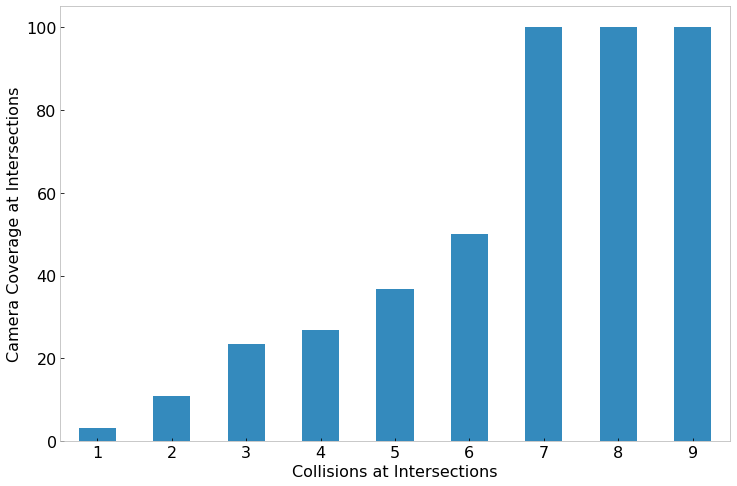

In [ ]:
graph1=itsc.plot.bar(y='Camera Coverage',
              rot=0, 
              figsize=(12,8), 
              grid=False,
              legend=False,
              fontsize=16)
graph1.set_ylabel('Camera Coverage at Intersections',fontdict={'fontsize':16})
graph1.set_xlabel('Collisions at Intersections',fontdict={'fontsize':16})
graph1.set_facecolor('white')

Text(0, 0.5, 'Collisions at Camera Monitored Intersections')

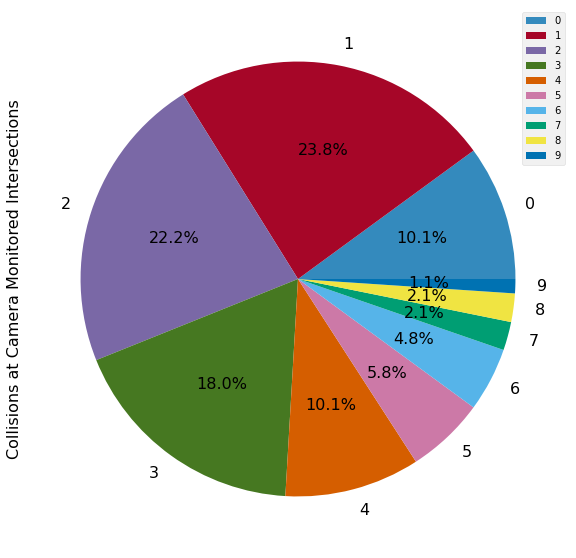

In [ ]:
graph2=camera.plot.pie(y='with Cameras',
                       figsize=(10,10),
                       fontsize=16,
                       autopct='%1.1f%%')
#graph2.legend("Collisions at Intersections")
graph2.set_ylabel('Collisions at Camera Monitored Intersections',fontdict={'fontsize':16})
#

In [ ]:


# plot two df of Toronto traffic accident and red light camera on one map, but it will be 
fig = go.Figure()

fig.add_trace(go.Scattermapbox(
        lat=itscaccidents_map['LATITUDE'],
        lon=itscaccidents_map['LONGITUDE'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=(itscaccidents_map['ACCNUM']*2),
            color='rgb(0, 0, 255)',
            opacity=0.5
        ),

        hoverinfo='text',
        hovertext=itscaccidents_map['ACCNUM'],
        name='Collisions at Intersections'
    ))

fig.add_trace(go.Scattermapbox(
        lat=redlight.LATITUDE,
        lon=redlight.LONGITUDE,
        mode='markers',
        
        marker=dict(
            size=8,
            
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        hoverinfo='text',
        hovertext=redlight['ACTIVATION_TIME'],
        name='Red Light Camera'
        
    ))


fig.update_layout(
    title='Collisions at Intersections Statistics (2006-2020)',
    autosize=True,
    hovermode='closest',
    showlegend=True,
    mapbox=dict(
        accesstoken=my_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=lat,
            lon=lng
        ),
        pitch=0,
        zoom=10
    ),
    mapbox_style='light',
    width=1200, height=800,
)

fig.show()
